In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei']    # 用来设置字体样式以正常显示中文标签
plt.rcParams['axes.unicode_minus']=False    # 默认是使用Unicode负号，设置正常显示字符，如正常显示负号


import warnings
warnings.filterwarnings('ignore')

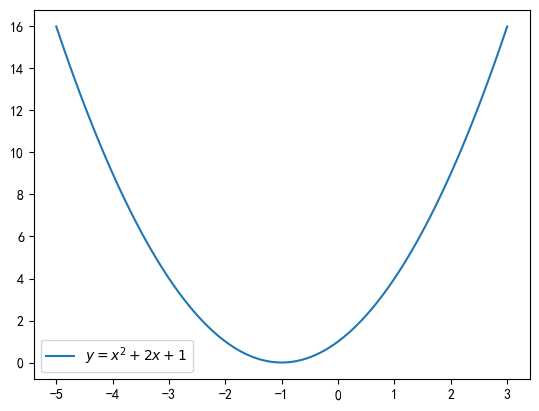

In [3]:
### 1. 画出$𝑦=𝑥^2+2𝑥+1$在区间[-5,3]的函数图像

import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 3, 100)
y = x**2 + 2*x + 1

plt.plot(x, y, label='$y = x^2 + 2x + 1$')

plt.legend()
plt.show()


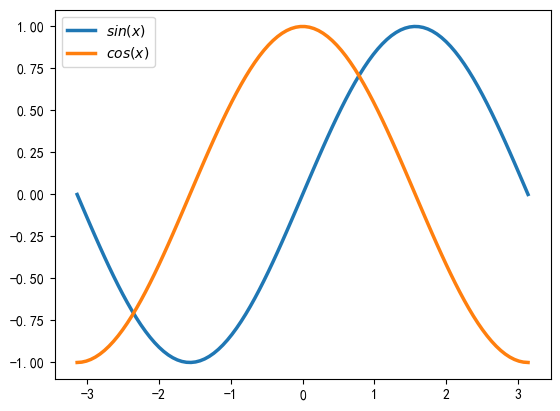

In [4]:
### 2. 在同一张图中创建两个子图，分别画出$sin(x)$和$cos(x)$在[-3.14,3.14]上的函数图像。设置线条宽度为2.5。

x = np.linspace(-np.pi,np.pi,100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(
    x
    ,y1
    ,label='$sin(x)$'
    ,linewidth = 2.5
)

plt.plot(
    x
    ,y2
    ,label='$cos(x)$'
    ,linewidth = 2.5
)

plt.legend()
plt.show()

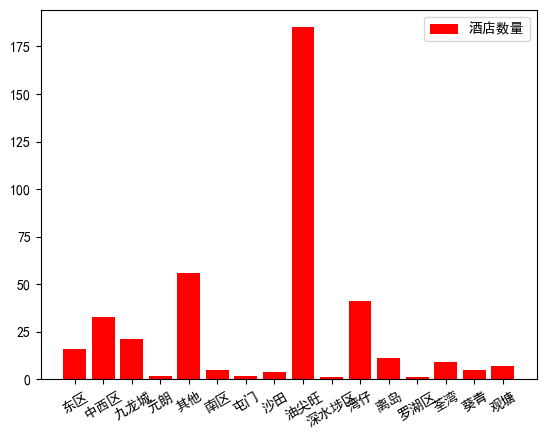

In [5]:
### 3. 读取保存的“酒店数据2”数据，画出每个地区酒店数量的柱状图，柱状颜色为红色。

df = pd.read_excel('酒店数据2.xlsx')
avg_data = df.groupby('地区').agg({'名字': 'count'}).reset_index()

x_data = avg_data['地区'].tolist()
y_data = avg_data['名字'].tolist()
    
plt.bar(
    x_data
    ,y_data
    ,label = '酒店数量'
    ,color = 'r'
    ,
)

plt.xticks(rotation=30)
plt.legend()
plt.show()

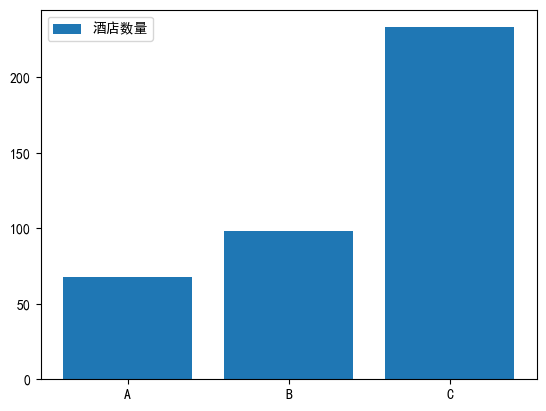

In [6]:
### 4. 画出每个价格等级酒店数量的柱状图。

avg_data = df.groupby('价格等级').agg({'名字': 'count'}).reset_index()

x_data = avg_data['价格等级'].tolist()
y_data = avg_data['名字'].tolist()
    
plt.bar(
    x_data
    ,y_data
    ,label = '酒店数量'
    # ,color = 'r'
    ,
)

# plt.xticks(rotation=30)
plt.legend()
plt.show()

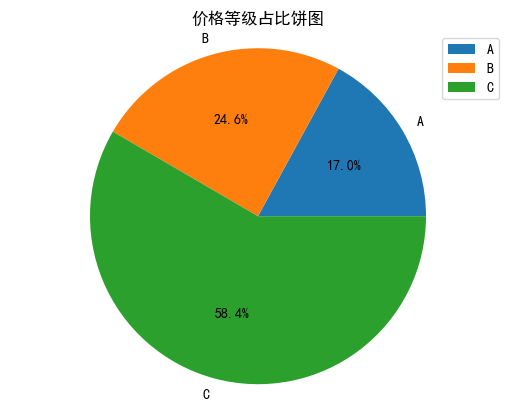

In [7]:
# 根据价格等级统计酒店数量
avg_data = df.groupby('价格等级').agg({'名字': 'count'}).reset_index()

x_data = avg_data['价格等级'].tolist()
y_data = avg_data['名字'].tolist()

plt.pie(y_data, labels=x_data, autopct='%1.1f%%')  # 绘制饼图，设置标签和百分比显示格式
plt.title('价格等级占比饼图')  # 设置标题
plt.axis('equal')  # 设置坐标轴比例相等，使饼图为圆形
plt.legend()  # 显示图例
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


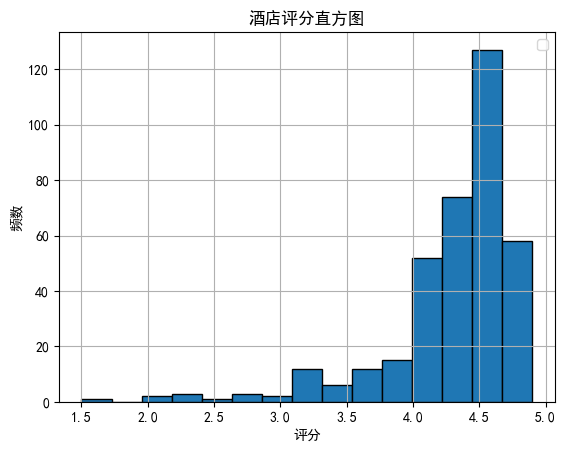

In [8]:
### 6. 画出酒店评分的直方图。

plt.hist(df['评分'], bins=15,  edgecolor='black')
plt.xlabel('评分')  
plt.ylabel('频数')  
plt.title('酒店评分直方图')  
plt.grid(True) 
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


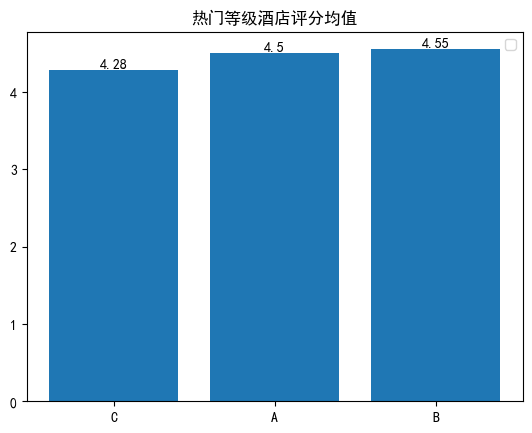

In [9]:
avg_df = df.groupby('热门等级').agg(
    {
        '评分':'mean'
    }
).sort_values('评分').reset_index()

plt.bar(avg_df['热门等级'], avg_df['评分'])

# 添加数值标签
for i in range(len(avg_df)):
    plt.text(avg_df['热门等级'][i], avg_df['评分'][i], round(avg_df['评分'][i], 2), ha='center', va='bottom')

# plt.xlabel("热门等级")
# plt.ylabel("评分均值")
plt.title('热门等级酒店评分均值')


plt.legend()
plt.show()

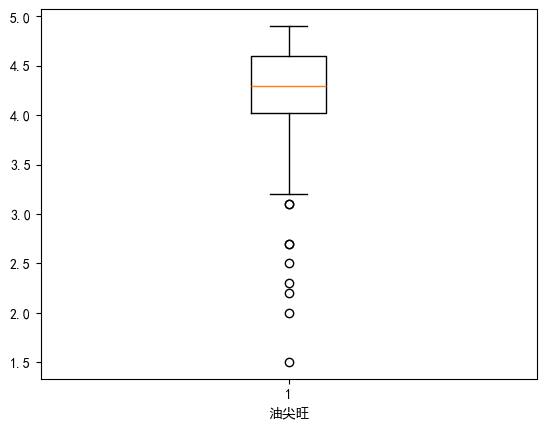

In [10]:
data = df[df['地区'] == '油尖旺']['评分'].dropna()

plt.boxplot(data)
plt.xlabel('油尖旺')
plt.show()

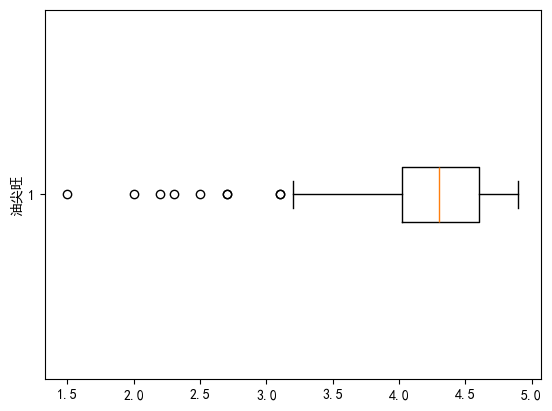

In [39]:
data = df[df['地区'] == '油尖旺']['评分'].dropna()

plt.boxplot(data,vert=False)
plt.ylabel('油尖旺')
plt.show()

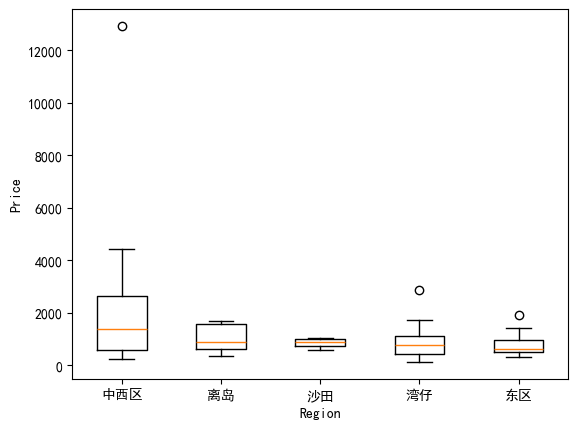

In [37]:
# 选出平均价格前5的地区
data = df.groupby('地区').agg(
    {
        '价格':'mean'
    }
).sort_values('价格',ascending=False).head(5).reset_index()['地区'].tolist()

# 收集选取的前5个地区的评分数据
score_data = [df[df['地区'] == region]['价格'] for region in data]

# 绘制箱线图
plt.boxplot(score_data, labels=data)
plt.xlabel("Region")
plt.ylabel("Price")
plt.show()


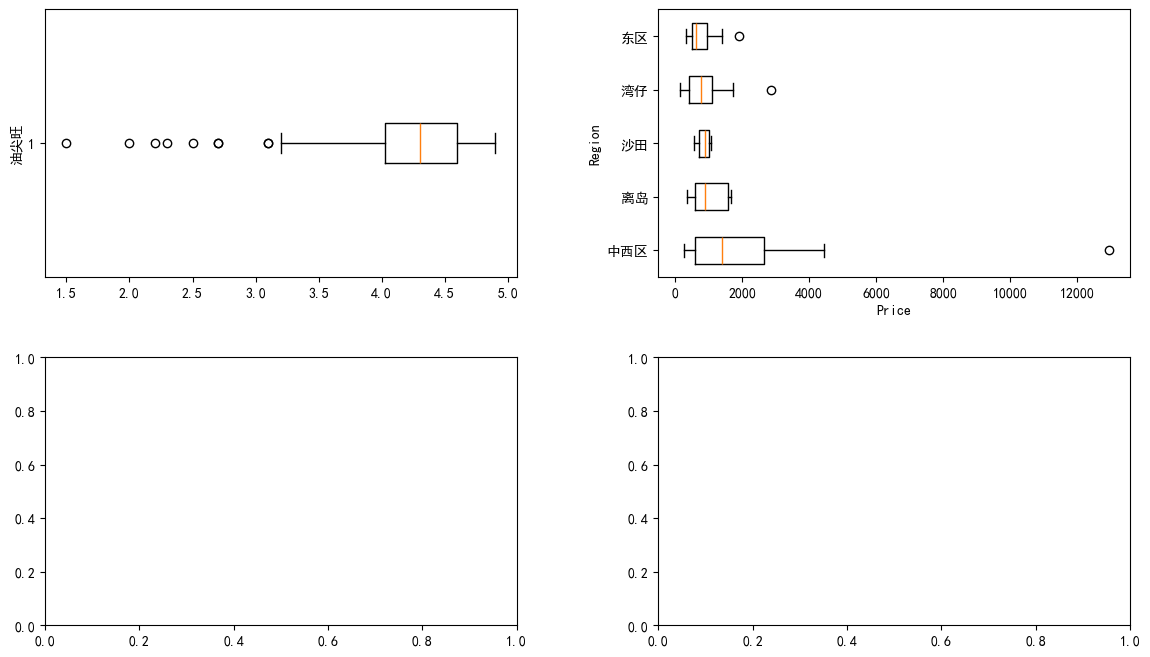

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

data = df[df['地区'] == '油尖旺']['评分'].dropna()

axes[0,0].boxplot(data,vert=False)
axes[0,0].set_ylabel('油尖旺')

data = df.groupby('地区').agg({'价格':'mean'}).sort_values('价格',ascending=False).head(5).reset_index()['地区'].tolist()
score_data = [df[df['地区'] == region]['价格'] for region in data]

# 绘制箱线图
axes[0,1].boxplot(score_data, labels=data,vert=False)
axes[0,1].set_ylabel("Region")
axes[0,1].set_xlabel("Price")

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

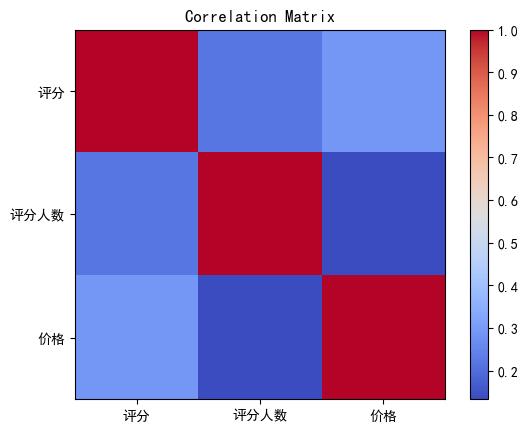

In [48]:
### 11. 绘制一个评分，评分人数和价格之间的相关系数图

# 计算评分、评分人数和价格之间的相关系数
correlation_matrix = df[['评分', '评分人数', '价格']].corr()

# 绘制相关系数矩阵的热力图
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()